In [1]:
# libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from unum import Unum
# data
from data.data import *

# setup
sns.set_theme()

In [2]:
# Read the data
raw_data: pd.DataFrame = data.parse_data('../report.txt')
df: pd.DataFrame = raw_data.loc[raw_data.name == 'matrix multiplication' ].copy()
print(df)

                     name      time  space
28  matrix multiplication  0.000004     10
29  matrix multiplication  0.000055     25
30  matrix multiplication  0.000417     50
31  matrix multiplication  0.001309     75
32  matrix multiplication  0.003117    100


In [3]:
# Calcualte values
df['flops'] = df.apply(lambda row: row.space**3 * 2, axis=1)
df['flopss'] = df.apply(lambda row: data.flopss(row.flops, row.time), axis=1)
df['op_intensity'] = df.apply(lambda row: data.operational_intensity(row.flops, row.space**2 * 4 * 3), axis=1)

performance_peak: float = data.performance_peak(4, 4.1, 64)
memory_peak: float = data.memory_peak()
ridge: float = data.roofing_ridge(performance_peak, memory_peak)

df['performance'] = df.apply(lambda row: data.attainable_performance(memory_peak, row.op_intensity, performance_peak), axis=1)

print('Performance Peak: ', performance_peak)
print('Memory Peak: ', memory_peak)
print('Ridge: ', ridge)
print(df)

Performance Peak:  1049.6
Memory Peak:  42.94967296
Ridge:  24.437904357910153
                     name      time  space    flops        flopss  \
28  matrix multiplication  0.000004     10     2000  5.266165e+08   
29  matrix multiplication  0.000055     25    31250  5.728847e+08   
30  matrix multiplication  0.000417     50   250000  5.994327e+08   
31  matrix multiplication  0.001309     75   843750  6.445022e+08   
32  matrix multiplication  0.003117    100  2000000  6.416035e+08   

    op_intensity  performance  
28      1.666667    71.582788  
29      4.166667   178.956971  
30      8.333333   357.913941  
31     12.500000   536.870912  
32     16.666667   715.827883  


In [20]:
# roofline data
operational_intensity = np.logspace(-2, 3, 500)  # generate a bunch of data for the x axys
df_roofline = pd.DataFrame({
    'name': 'roofline',
    'op_intensity': operational_intensity,
    'performance':  memory_peak * operational_intensity
})

df_roofline['performance'] = np.minimum(df_roofline['performance'], performance_peak)
print(df_roofline[307:])

         name  op_intensity  performance
307  roofline     11.916598   511.814005
308  roofline     12.194734   523.759853
309  roofline     12.479362   535.984519
310  roofline     12.770633   548.494511
311  roofline     13.068702   561.296490
..        ...           ...          ...
495  roofline    911.842520  1049.600000
496  roofline    933.125118  1049.600000
497  roofline    954.904456  1049.600000
498  roofline    977.192128  1049.600000
499  roofline   1000.000000  1049.600000

[193 rows x 3 columns]


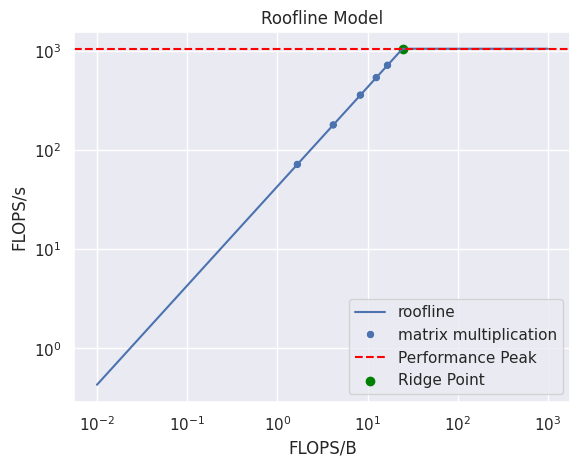

In [19]:
# plot
sns.lineplot(
    data=df_roofline, hue='name',
    x="op_intensity", y="performance",
)
sns.scatterplot(
    data=df, hue='name',
    x="op_intensity", y="performance",
)
# Performance peak line
plt.axhline(y=performance_peak, color='red', linestyle='--', label='Performance Peak')
# Ridge point
plt.scatter(ridge, ridge*memory_peak, color='green', label='Ridge Point')

plt.xscale('log')
plt.yscale('log')
plt.title('Roofline Model')
plt.xlabel('FLOPS/B')
plt.ylabel('FLOPS/s')
plt.legend()
plt.show()